In [1]:
from eda_imports import *
from adjustText import adjust_text

In [2]:
df_gb = pd.read_csv('../benchmark_transcriptome/tcga-run-4/benchmark-gradboost.pr_curve.csv')

In [3]:
df_gb.head(2)

,recall,prec,f1,threshold,tree_max_depth,sample_id
0,0.242732,0.026774,0.048228,0.00,1,HBRC4
1,0.186015,0.201010,0.193222,0.05,1,HBRC4


In [4]:
df_gb.sample_id.value_counts()

HBRC4    63
HBRC6    63
UHRC2    63
UHRC1    63
Name: sample_id, dtype: int64

In [17]:
sids = np.sort(df_gb.sample_id.unique())
depths = np.sort(df_gb.tree_max_depth.unique())

In [57]:
df_k2dt = pd.read_csv('../kleat3_dev/preds_kleat2_whole_transcriptome.csv', sep='\t', header=None,
                 names=['sample_id', 'tree_max_depth', 'precision', 'recall', 'f1'])
df_k2dt['program'] = 'KLEAT2+DT'
df_k2dt.sample_id = df_k2dt.sample_id.replace({
    'UHRR-C1_S1_RNABloom': 'UHRC1',
    'UHRR-C2_S2_RNABloom': 'UHRC2',
    'Brain-C6_S4_RNABloom': 'HBRC6',
    'Brain-C4_S3_RNABloom': 'HBRC4',
})

In [75]:
ndf_k2dt = df_k2dt.query('tree_max_depth == 7')

In [78]:
ndf_k2dt

,sample_id,tree_max_depth,precision,recall,f1,program
20,HBRC4,7,0.847618,0.109956,0.194660,KLEAT2+DT
21,HBRC6,7,0.839193,0.100916,0.180166,KLEAT2+DT
22,UHRC1,7,0.837958,0.089243,0.161307,KLEAT2+DT
23,UHRC2,7,0.832997,0.092322,0.166221,KLEAT2+DT


# UHRC1 only

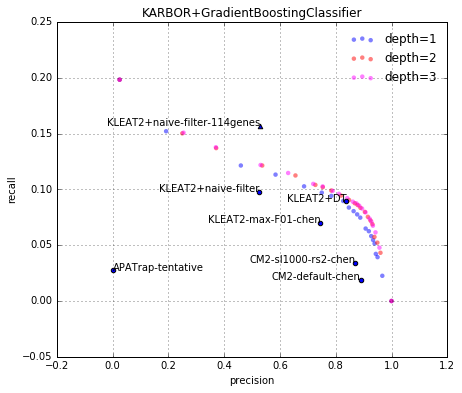

In [88]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)

color_dd = dict(zip(depths, ['blue', 'red', 'magenta', 'green', 'cyan', 'yellow', 'black']))

sid = 'UHRC1'

for depth in depths:
    _df = df_gb.query(f'tree_max_depth == "{depth}"').query(f'sample_id == "{sid}"')
    color = color_dd[depth]
    _df.plot.scatter('prec', 'recall', marker='o', alpha=0.5,
                    edgecolor='none', color=color, ax=ax, label=f'depth={depth}')

k2dt_vals = ndf_k2dt.query(f'sample_id == "{sid}"')[['precision', 'recall']].values[0]
ax.scatter([k2dt_vals[0]], [k2dt_vals[1]])
txt = ax.text(k2dt_vals[0], k2dt_vals[1], 'KLEAT2+DT', ha='right')

if sid == "UHRC1":
    k2_nf_prec, k2_nf_recall = [0.5264736297828335, 0.098001848001848]
    ax.scatter([k2_nf_prec], [k2_nf_recall])
    txt = ax.text(k2_nf_prec, k2_nf_recall, 'KLEAT2+naive-filter', ha='right')

    k2_nf_prec_114genes, k2_nf_recall_114genes = [0.530055, 0.156704]
    ax.scatter([k2_nf_prec_114genes], [k2_nf_recall_114genes], marker='^')
    txt = ax.text(k2_nf_prec_114genes, k2_nf_recall_114genes, 'KLEAT2+naive-filter-114genes', ha='right')

    apatrap_prec, apatrap_recall = [0.0007928734667226342, 0.027463651050080775]
    ax.scatter([apatrap_prec], [apatrap_recall])
    txt = ax.text(apatrap_prec, apatrap_recall, 'APATrap-tentative')

    # slight overestimate based on the graph
    cm2_default = [0.89, 0.019]
    ax.scatter([cm2_default[0]], [cm2_default[1]])
    txt = ax.text(cm2_default[0], cm2_default[1], 'CM2-default-chen', ha='right')

    cm2_sl1000_rs2 = [0.87, 0.034] 
    ax.scatter([cm2_sl1000_rs2[0]], [cm2_sl1000_rs2[1]])
    txt = ax.text(cm2_sl1000_rs2[0], cm2_sl1000_rs2[1], 'CM2-sl1000-rs2-chen', ha='right')
    texts.append(txt)

    k2_chen = [0.745, 0.07]
    ax.scatter([k2_chen[0]], [k2_chen[1]])
    txt = ax.text(k2_chen[0], k2_chen[1], 'KLEAT2-max-F01-chen', ha='right')

ax.set_title(sid)

ax.set_xlabel('precision')
ax.set_ylabel('recall')
ax.grid()

ax.legend(loc='best', framealpha=0)
# ax.set_xlim(-0.025, 1.025)
# ax.set_ylim(-0.025, 0.225)

ax.set_title('KARBOR+GradientBoostingClassifier')
plt.savefig('../benchmark_transcriptome/tcga-run-4/benchmark-with-other-tools.png', dpi=200)

0,1,2,3,

Text(0.5,1.01,'KARBOR+GradientBoostingClassifier')

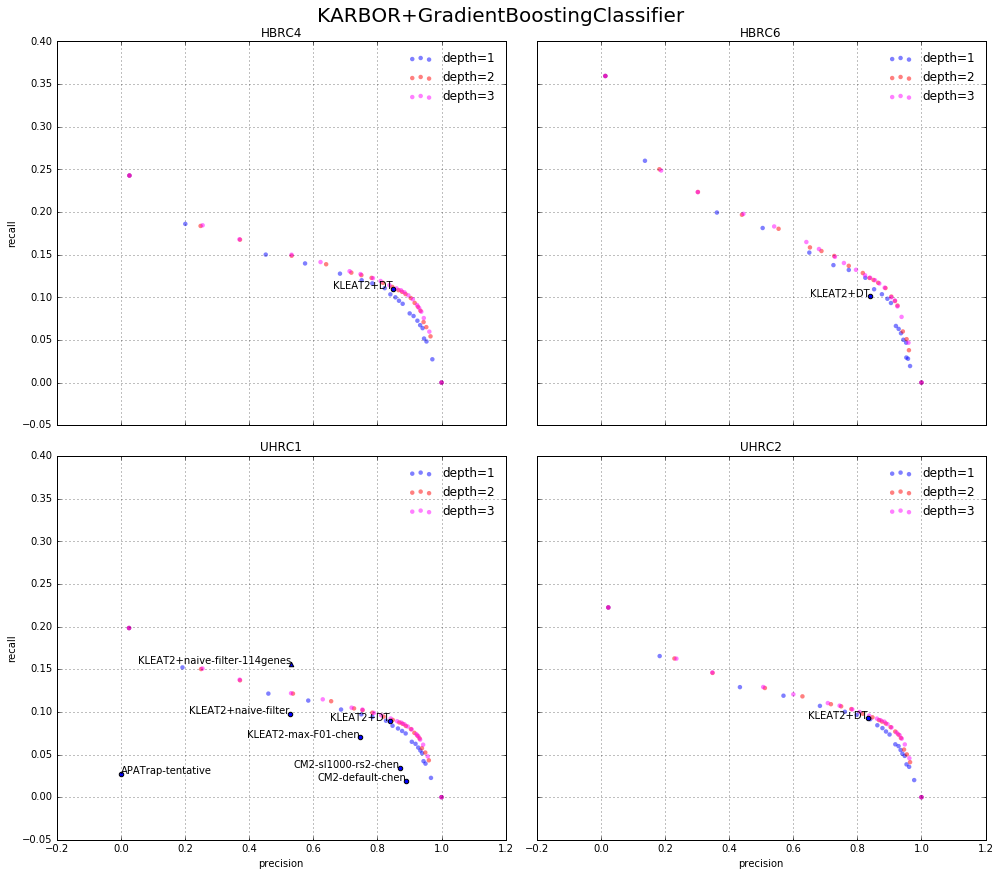

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), 
                         sharex=True, sharey=True
                        )
axes = axes.ravel()

color_dd = dict(zip(depths, ['blue', 'red', 'magenta', 'green', 'cyan', 'yellow', 'black']))

for k, sid in enumerate(sids):
    print(k, end=',')
    ax = axes[k]
    
    for depth in depths:
        _df = df_gb.query(f'tree_max_depth == "{depth}"').query(f'sample_id == "{sid}"')
        color = color_dd[depth]
        _df.plot.scatter('prec', 'recall', marker='o', alpha=0.5,
                        edgecolor='none', color=color, ax=ax, label=f'depth={depth}')

    k2dt_vals = ndf_k2dt.query(f'sample_id == "{sid}"')[['precision', 'recall']].values[0]
    ax.scatter([k2dt_vals[0]], [k2dt_vals[1]])
    txt = ax.text(k2dt_vals[0], k2dt_vals[1], 'KLEAT2+DT', ha='right')
    
    if sid == "UHRC1":
        k2_nf_prec, k2_nf_recall = [0.5264736297828335, 0.098001848001848]
        ax.scatter([k2_nf_prec], [k2_nf_recall])
        txt = ax.text(k2_nf_prec, k2_nf_recall, 'KLEAT2+naive-filter', ha='right')
        
        k2_nf_prec_114genes, k2_nf_recall_114genes = [0.530055, 0.156704]
        ax.scatter([k2_nf_prec_114genes], [k2_nf_recall_114genes], marker='^')
        txt = ax.text(k2_nf_prec_114genes, k2_nf_recall_114genes, 'KLEAT2+naive-filter-114genes', ha='right')
        
        apatrap_prec, apatrap_recall = [0.0007928734667226342, 0.027463651050080775]
        ax.scatter([apatrap_prec], [apatrap_recall])
        txt = ax.text(apatrap_prec, apatrap_recall, 'APATrap-tentative')
        
        # slight overestimate based on the graph
        cm2_default = [0.89, 0.019]
        ax.scatter([cm2_default[0]], [cm2_default[1]])
        txt = ax.text(cm2_default[0], cm2_default[1], 'CM2-default-chen', ha='right')
        
        cm2_sl1000_rs2 = [0.87, 0.034] 
        ax.scatter([cm2_sl1000_rs2[0]], [cm2_sl1000_rs2[1]])
        txt = ax.text(cm2_sl1000_rs2[0], cm2_sl1000_rs2[1], 'CM2-sl1000-rs2-chen', ha='right')
        texts.append(txt)
        
        k2_chen = [0.745, 0.07]
        ax.scatter([k2_chen[0]], [k2_chen[1]])
        txt = ax.text(k2_chen[0], k2_chen[1], 'KLEAT2-max-F01-chen', ha='right')

        
    ax.set_title(sid)
    
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')
    ax.grid()
    
    ax.legend(loc='best', framealpha=0)
    
#     ax.set_xlim(0.55, 0.95)
#     ax.set_ylim(0.02, 0.16)
    
#     adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.suptitle('KARBOR+GradientBoostingClassifier', y=1.01, fontsize=20)

In [ ]:
ax.text